



# The Bear Necessities
## Getting to grips with pandas

After the previous session, with its introductory plotting and numerical data handling, by far the most common request for this session was data analysis tools. The second request was that we deal with some Excel importing. In Python, the primary analysis tool we can use for general datasets is called **pandas**. To quote the docs (emphasis mine):

[http://pandas.pydata.org/](http://pandas.pydata.org/)

>  Python has long been great for **data munging and preparation**,
>  but less so for **data analysis and modeling**.

>  **pandas** helps **fill this gap**, enabling you to carry out your **entire data analysis workflow in Python** without having to switch to a more domain specific language like R.

My summary is, pandas is to Excel as numpy/scipy/etc. are to MATLAB. You don't have the nice GUI interface, but you do have easily scriptable automation and all the power of Python to do pretty much anything with your data. In this session, we will begin by importing an XLS file and doing some basic manipulation. I'll show you a slightly quicker way, and then we will get on with some analysis. Time permitting, we will do some plotting, and more advanced pandas techniques, before finishing off by dynamically incorporating online database data into our XLS analysis.

If you are thinking of experimenting with some data, I would highly recommend you check out OpenDataNI:

![OpenDataNI Screenshot](https://github.com/flaxandteal/python-course/blob/master/009-data-analysis/images/screenshot-opendatani.png?raw=1)

Good in general, but unfortunately for this session, they force public sector bodies to upload data in standardized, universally-supported formats, so not Microsoft Excel. Instead, we will grab some data from a longer-running project, from when it was common to accept a broader range of formats: [data.gov.uk](https://data.gov.uk/data/search?res_format=XLS)

# data.gov.uk
## Social Trends 2011

![data.gov.uk Excel data](https://github.com/flaxandteal/python-course/blob/master/009-data-analysis/images/screenshot-datagovuk.png?raw=1)

Conveniently, as this is under the Open Government License, I've been able to put a copy of the relevant Excel file in the *data* folder below this notebook.

In the last session, we spent a lot of time using Jupyter as a workflow, stepping from one box to the next. That's fine for experimenting with data, or keeping a journal of what you're doing, but not so useful if you want a repeatable script. This afternoon, we are going to use a standalone IDE to do some scripting. However, for the moment, keeping our notes and our code in one place is handy, so we will work through a series of short scripts in Jupyter.

Firstly though, we will need to check that the libraries pandas and xlrd are installed.

Second, we should take a look at the Excel file and see what we are actually dealing with...

Thirdly, we run the script below. Don't worry about the detail just this second, we will work through it step by step, as there are a few subtleties.

In [ ]:
import pandas as pd

# [A]
excel_file = pd.ExcelFile('/content/expenditure.xls')

# [B] Pick out an interesting table - 2011 value of household expenditure by purpose
df = excel_file.parse('Table 1')

# [C] Cut down to the relevant table
df = df.loc[4:26]

# [D] Challenge here!
df = df.dropna(how='all', axis=0)
df = df.dropna(how='all', axis=1)
df

,Table 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 7
4,NaN,1971.0,1981.000000,1991.000000,2001.000000,2009.000000,2009
5,Food and non-alcoholic beverages,100.0,104.640913,117.230576,136.729755,151.008988,83.813
6,Alcoholic beverages and tobacco,100.0,99.237497,92.064204,88.024221,89.613302,31.128
7,Clothing and footwear,100.0,119.877158,186.847400,344.276183,552.546860,47.599
8,"Housing, water and fuels2",100.0,116.734336,138.879523,152.250032,160.082001,193.447
9,"Furnishings, household equipment and maintenance",100.0,116.808722,159.656426,261.638586,262.682524,43.867
10,Miscellaneous goods and services,100.0,120.876377,240.394746,336.047068,377.225149,104.765
12,Restaurants and hotels3,100.0,125.594386,167.157564,193.105120,185.494668,88.763
13,Recreation and culture,100.0,158.242026,279.165652,544.963883,868.809350,99.26
14,Transport,100.0,127.948926,180.949507,246.488683,272.763784,124.616


First off, lets have a look at that Excel file we loaded. There are a few Excel-file-specific properties methods of interest, but we will start with:

In [ ]:
excel_file.sheet_names

['Expenditure',
 'Figure 1',
 'Table 1',
 'Figure 2',
 'Figure 3',
 'Figure 4',
 'Figure 5',
 'Figure 6',
 'Figure 7',
 'Figure 8',
 'Figure 9',
 'Figure 10',
 'Figure 11',
 'Figure 12']

The basic unit of pandas operations is the DataFrame, kind of like numpy is centred on numpy arrays. In fact, originally the pandas DataFrame subclassed numpy arrays, (but nowadays it's a completely separate implementation). A DataFrame is a bit like a spreadsheet or database table. In my head they look a bit like this:

![What I think a data-frame looks like](https://github.com/flaxandteal/python-course/blob/master/009-data-analysis/images/dataframe.png?raw=1)

Notice that multi-level indexes are fine - we can sub-divide rows even further than that if we really want. So, this really corresponds to a single-table spreadsheet. So we pick our sheet out of the Excel document at line `[B]`

In [ ]:
df = excel_file.parse('Table 1')

What's this data look like? Well, remember, in Excel it looked like:

![Screenshot of Excel data](https://github.com/flaxandteal/python-course/blob/master/009-data-analysis/images/screenshot-excel.png?raw=1)

In pandas it looks like:

In [ ]:
df

,Table 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Volume of household expenditure:1 by purpose,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,Index numbers (1971=100)
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,£ billions
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(current prices)
4,NaN,1971.0,1981.000000,1991.000000,2001.000000,2009.000000,NaN,2009
5,Food and non-alcoholic beverages,100.0,104.640913,117.230576,136.729755,151.008988,NaN,83.813
6,Alcoholic beverages and tobacco,100.0,99.237497,92.064204,88.024221,89.613302,NaN,31.128
7,Clothing and footwear,100.0,119.877158,186.847400,344.276183,552.546860,NaN,47.599
8,"Housing, water and fuels2",100.0,116.734336,138.879523,152.250032,160.082001,NaN,193.447
9,"Furnishings, household equipment and maintenance",100.0,116.808722,159.656426,261.638586,262.682524,NaN,43.867


You should try this without the `.head()`. Well... all the data is there, but a whole load of `NaN` entries corresponding to the empty cells. The table we actually want is in the (Excel) range [A6:H28].

We can grab a row using the syntax `df.loc[ROW]`, where `ROW` is the row we want.

Now, if we grab row 6, what happens?

In [ ]:
df.loc[6]

,6
Table 1,Alcoholic beverages and tobacco
Unnamed: 1,100.0
Unnamed: 2,99.237497
Unnamed: 3,92.064204
Unnamed: 4,88.024221
Unnamed: 5,89.613302
Unnamed: 6,NaN
Unnamed: 7,31.128


The default column names - "Unnamed: 1", etc. - aren't very helpful. We can use a handy pandas trick to rename column headings to letters of the alphabet...

In [ ]:
import string
column_count = len(df.columns)
df.columns = list(string.ascii_uppercase)[0:column_count]

# Show our sheet again, with new column names
df.head()

,A,B,C,D,E,F,G,H
0,Volume of household expenditure:1 by purpose,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,Index numbers (1971=100)
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,£ billions
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(current prices)
4,NaN,1971.0,1981.0,1991.0,2001.0,2009.0,NaN,2009


This actually accepts the list slicing syntax we learned last time, e.g. `df.loc[6:7]`

In [ ]:
df.loc[6:7]

,A,B,C,D,E,F,G,H
6,Alcoholic beverages and tobacco,100.0,99.237497,92.064204,88.024221,89.613302,NaN,31.128
7,Clothing and footwear,100.0,119.877158,186.847400,344.276183,552.546860,NaN,47.599


Notice that when we picked out a single row we got something that looks a bit different - an ASCII table instead of one of those nice formatted HTML-y things. That's because pandas has a concept called Series, like a 1D array, with rows. When we pick a single row or column, that's what we get back. Don't worry too much about why they are different, just think of them as a single-dimensional list of spreadsheet cells, but bear in mind, 1D data isn't actually a DataFrame.

If you're really astute, you will have noticed that `df.loc[6]` is not the same as Excel's [A6:H6]. Quiz question - why?
<span style='color: white; background: white'>(a) Python is zero-indexed and (b) it treats the first row in Excel as the header, so in total Python is different by two</span> <-- (the answer is hidden here if you're desperate, highlight the text with your mouse)

So actually, the header row in Excel, [A6:H6], corresponds to `df.loc[4]`:

In [ ]:
df.loc[4]

,4
A,NaN
B,1971.0
C,1981.0
D,1991.0
E,2001.0
F,2009.0
G,NaN
H,2009


At step `[C]` we trim down a bit and extract only table we are interested in. Notice that we don't worry about the columns - pandas has spotted no more data comes after column H and stops adding them in at that point.

In [ ]:
df = df.loc[4:26]

In [ ]:
df

,A,B,C,D,E,F,G,H
4,NaN,1971.0,1981.000000,1991.000000,2001.000000,2009.000000,NaN,2009
5,Food and non-alcoholic beverages,100.0,104.640913,117.230576,136.729755,151.008988,NaN,83.813
6,Alcoholic beverages and tobacco,100.0,99.237497,92.064204,88.024221,89.613302,NaN,31.128
7,Clothing and footwear,100.0,119.877158,186.847400,344.276183,552.546860,NaN,47.599
8,"Housing, water and fuels2",100.0,116.734336,138.879523,152.250032,160.082001,NaN,193.447
9,"Furnishings, household equipment and maintenance",100.0,116.808722,159.656426,261.638586,262.682524,NaN,43.867
10,Miscellaneous goods and services,100.0,120.876377,240.394746,336.047068,377.225149,NaN,104.765
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Restaurants and hotels3,100.0,125.594386,167.157564,193.105120,185.494668,NaN,88.763
13,Recreation and culture,100.0,158.242026,279.165652,544.963883,868.809350,NaN,99.26


<img alt="Cut down screenshot showing the DataFrame's new coverage" src="https://github.com/flaxandteal/python-course/blob/master/009-data-analysis/images/screenshot-excel-cutdown.png?raw=1" style='max-height: 400px' />

In [ ]:
df.loc[4:6, "B":"C"]

,B,C
4,1971.0,1981.000000
5,100.0,104.640913
6,100.0,99.237497


As a side-point, you can slice in two directions, as with numpy arrays. For instance:

# Challenge
## Fix the stars in `[D]`

Remember to vote when finished! https://www.strawpoll.me/20175488

You'll need the pandas docs [http://pandas.pydata.org/pandas-docs/stable/api.html](http://pandas.pydata.org/pandas-docs/stable/api.html)

So, now we just need to deal with all those `NaN`s. Thankfully, this is something pandas is especially good at. Generally speaking, you can just work with the data and it will ignore those `NaN` entries when you sum, or average, or whatever. However, this table only has `NaN`s in full rows and columns, so (except for one row) we can excise them very neatly. However, this is a challenge for you - fill in the 9 mising characters in `[D]`, marked as asterisks, to complete the script above! You should get printed output showing many rows and columns, all with string or numeric entries. There will a few `NaN`s left though in a row...

The final few `NaN`s are actually to do with some cells having spaces or so forth in them. Because we used the `all` argument, all cells in the row or column must be `NaN` for it to be removed. But this is really a loading-time problem - how do we tell pandas to recognise a space character as a NaN value (also known as NA values)? Start here... [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.ExcelFile.parse.html#pandas.ExcelFile.parse](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.ExcelFile.parse.html#pandas.ExcelFile.parse)

# Challenge

Can you modify the ExcelFile class's `parse(...)` arguments to treat cells with only a space in them as `NaN`s?

Don't read through the following code snippets until you work it out!

# Doing something with the data
## Making it all worthwhile

In [ ]:
## SECOND VERSION OF SCRIPT

import pandas as pd

# [A]
excel_file = pd.ExcelFile('/content/expenditure.xls')

# [B] Pick out an interesting table - 2011 value of household expenditure by purpose
df = excel_file.parse('Table 1', na_values=' ')

# [C] Cut down to the relevant table
df = df.loc[4:26]

# [D] Strip out empty rows and columns
df = df.dropna(how='all', axis=0)
df = df.dropna(how='all', axis=1)

# [E] Reindex/column to desired table
df.loc[4, "Table 1"] = 0               # E1
df.columns = df.loc[4, :].astype(int)  # E2
df = df.iloc[1:]                            # E3
df.index = df[0]                       # E4
df.index.name = "Category"             # E5
df = df.loc[:, "1971":]                   # E6
df.columns.name = "Years"              # E7
df

Years,1971,1981,1991,2001,2009,2009
Category,,,,,,
Food and non-alcoholic beverages,100.0,104.640913,117.230576,136.729755,151.008988,83.813
Alcoholic beverages and tobacco,100.0,99.237497,92.064204,88.024221,89.613302,31.128
Clothing and footwear,100.0,119.877158,186.847400,344.276183,552.546860,47.599
"Housing, water and fuels2",100.0,116.734336,138.879523,152.250032,160.082001,193.447
"Furnishings, household equipment and maintenance",100.0,116.808722,159.656426,261.638586,262.682524,43.867
Miscellaneous goods and services,100.0,120.876377,240.394746,336.047068,377.225149,104.765
Restaurants and hotels3,100.0,125.594386,167.157564,193.105120,185.494668,88.763
Recreation and culture,100.0,158.242026,279.165652,544.963883,868.809350,99.26
Transport,100.0,127.948926,180.949507,246.488683,272.763784,124.616


### Exercise: E-numbers

Have a look at Etherpad, and get the number of your introductory row - if it's over 7, subtract 7. Have a look at the corresponding "En" row above and work out exactly what it does and why. You may need to think through some of the lines above.

In Etherpad, where there is a space left for notes on this challenge put as full and descriptive notes as possible.

In [ ]:
## THIRD VERSION OF SCRIPT

import pandas as pd

# Pick out an interesting table - 2011 value of household expenditure by purpose
df = pd.read_excel(
    '/content/expenditure.xls',
    sheet_name='Table 1',
    na_values=' ',
    header=5,
    index_col=0,
    usecols=(0, 1, 2, 3, 4, 5, 7)
).dropna()

df.index.name = "Category"
df.columns.name = "Years"
df

Years,1971,1981,1991,2001,2009,2009.1
Category,,,,,,
Food and non-alcoholic beverages,100.0,104.640913,117.230576,136.729755,151.008988,83.813
Alcoholic beverages and tobacco,100.0,99.237497,92.064204,88.024221,89.613302,31.128
Clothing and footwear,100.0,119.877158,186.847400,344.276183,552.546860,47.599
"Housing, water and fuels2",100.0,116.734336,138.879523,152.250032,160.082001,193.447
"Furnishings, household equipment and maintenance",100.0,116.808722,159.656426,261.638586,262.682524,43.867
Miscellaneous goods and services,100.0,120.876377,240.394746,336.047068,377.225149,104.765
Restaurants and hotels3,100.0,125.594386,167.157564,193.105120,185.494668,88.763
Recreation and culture,100.0,158.242026,279.165652,544.963883,868.809350,99.260
Transport,100.0,127.948926,180.949507,246.488683,272.763784,124.616


Now, there are a couple of take-away points here. First, I'm really irritating. Second, in Python, parsing functions also contain bonus arguments to do standard transformations, whether it's from CSV, Excel, SQL or whatever - always have a quick check through the documentation to see if you are re-inventing the wheel.

However, when you need more control - say, you have to play around with messier data than this, or some of those arguments (like desired columns) must be calculated *after* the data is loaded - then the first examples show how you can tweak pandas data to do exactly what you want.

A formatting point: while Python determines code blocks entirely by indenting, between parens (and many other places), whitespace does not matter, and so I can spread the parse call over several lines. As `read_excel` returns DataFrame, we can call `dropna()` on the returned value directly and get back the tidied DataFrame.

If we look back at the Excel file, we see that the 2009.1 column is actually a different unit. The first five columns are percentages comparative based on 1971 - so, from 1971 to 2009, the amount spent on food and drink has risen by about 50% (to 151%). In case you're thinking, "but bread cost a tenth of today's price in 1970!", bear in mind that this is already adjusted for inflation.

The last column is an absolute value in billions sterling (don't ask me why "current prices" are marked 2009 in a spreadsheet ONS marked 2011). So maybe a subindex with "as % of 1971" and "in today's currency" as a breakdown would be handy, rather than mixing up the types in a single row.

/tmp/ipython-input-1487353451.py:27: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stacked_df = joined_df.stack(level=0)


,%1971,today's money
1971,100.000000,1.664731
1981,190.027855,3.163452
1991,306.406685,5.100846
2001,789.582173,13.144416
2009,1126.128134,18.747000


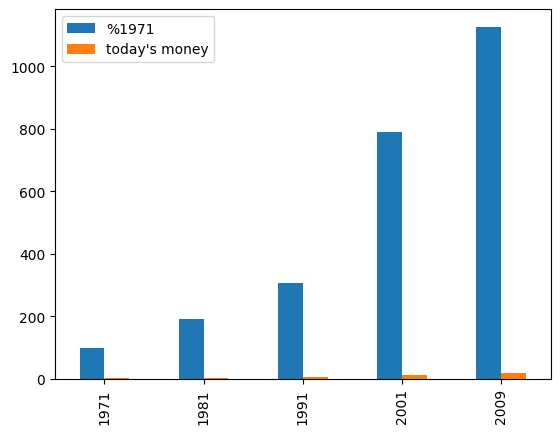

In [ ]:
## FOURTH VERSION OF SCRIPT

import pandas as pd

# Pick out an interesting table - 2011 value of household expenditure by purpose
df = pd.read_excel(
    '/content/expenditure.xls',
    sheet_name='Table 1',
    na_values=' ',
    header=5,
    index_col=0,
    usecols=(0, 1, 2, 3, 4, 5, 7)
).dropna()

df.index.name = "Category"
df.columns.name = "Years"

# [F]
df.columns = map(str, df.columns)
perc1971 = df.loc[:, '1971': '2009']
todaysCurrency = pd.DataFrame({'2009': df['2009.1']})

# [G]
joined_df = pd.concat((perc1971, todaysCurrency), axis=1, keys=("%1971", "today's money"))

# [H]
stacked_df = joined_df.stack(level=0)

# [I]
def calculate_prices_in_todays_money_for_row(x):
    if x.name[1] != "today's money":
        return x

    percent_row = (x.name[0], "%1971")
    ratio = stacked_df.loc[percent_row, :]
    ratio2009 = stacked_df.loc[percent_row, '2009']

    return ratio * x['2009'] / ratio2009

filled_df = stacked_df.apply(calculate_prices_in_todays_money_for_row, axis=1)

# [J]
# You only need this line in Jupyter
%matplotlib inline

transposed_df = filled_df.transpose()
transposed_df["Communication"].plot(kind='bar')
transposed_df["Communication"]

Now, this is a bit more intricate. What we do use pandas understanding of multiple levels of columns. I say 'understanding' because pandas actually knows what to do with sub-columns, what they are, how they are layered and how to manipulate them, as opposed to a basic Excel spreadsheet that just displays what you put in the cells.

So, we want to stop mixing up our several ratio columns and our actual currency column...

In [ ]:
# Make the cols strings, not integers
df.columns = map(str, df.columns)
# Pick out all rows and cols 1971 to 2009
# (remember, loc lets us identify them by actual row/column names)
perc1971 = df.loc[:, '1971': '2009'] # [F]
# Pick out the 2009 column, and make it a DataFrame of its own
# We do this with a 1-element dictionary (remember those?)
todaysCurrency = pd.DataFrame({'2009': df['2009.1']})

In [ ]:
perc1971.head()

,1971,1981,1991,2001,2009
Category,,,,,
Food and non-alcoholic beverages,100.0,104.640913,117.230576,136.729755,151.008988
Alcoholic beverages and tobacco,100.0,99.237497,92.064204,88.024221,89.613302
Clothing and footwear,100.0,119.877158,186.847400,344.276183,552.546860
"Housing, water and fuels2",100.0,116.734336,138.879523,152.250032,160.082001
"Furnishings, household equipment and maintenance",100.0,116.808722,159.656426,261.638586,262.682524


In [ ]:
todaysCurrency.head()

,2009
Category,
Food and non-alcoholic beverages,83.813
Alcoholic beverages and tobacco,31.128
Clothing and footwear,47.599
"Housing, water and fuels2",193.447
"Furnishings, household equipment and maintenance",43.867


That's not a whole lot of use, unless we can put them back together...

In [ ]:
df

,1971,1981,1991,2001,2009,2009.1
Category,,,,,,
Food and non-alcoholic beverages,100.0,104.640913,117.230576,136.729755,151.008988,83.813
Alcoholic beverages and tobacco,100.0,99.237497,92.064204,88.024221,89.613302,31.128
Clothing and footwear,100.0,119.877158,186.847400,344.276183,552.546860,47.599
"Housing, water and fuels2",100.0,116.734336,138.879523,152.250032,160.082001,193.447
"Furnishings, household equipment and maintenance",100.0,116.808722,159.656426,261.638586,262.682524,43.867
Miscellaneous goods and services,100.0,120.876377,240.394746,336.047068,377.225149,104.765
Restaurants and hotels3,100.0,125.594386,167.157564,193.105120,185.494668,88.763
Recreation and culture,100.0,158.242026,279.165652,544.963883,868.809350,99.260
Transport,100.0,127.948926,180.949507,246.488683,272.763784,124.616


In [ ]:
joined_df = pd.concat((perc1971, todaysCurrency), axis=1, keys=("%1971", "today's money")) # [G]
joined_df

%1971              \
                                                   1971        1981   
Category                                                              
Food and non-alcoholic beverages                  100.0  104.640913   
Alcoholic beverages and tobacco                   100.0   99.237497   
Clothing and footwear                             100.0  119.877158   
Housing, water and fuels2                         100.0  116.734336   
Furnishings, household equipment and maintenance  100.0  116.808722   
Miscellaneous goods and services                  100.0  120.876377   
Restaurants and hotels3                           100.0  125.594386   
Recreation and culture                            100.0  158.242026   
Transport                                         100.0  127.948926   
Communication                                     100.0  190.027855   
Health                                            100.0  124.598291   
Education                                         100.0  160.173877   
Total domestic household expenditure              100.0  120.735811   
  Total goods                                     100.0  116.882766   
  Total services                                  100.0  127.667167   
UK tourist expenditure abroad                     100.0  193.380615   
 less foreign tourist expenditure                 100.0  151.616612   
Household final consumption expenditure4          100.0  121.341138   

                                                                          \
                                                        1991        2001   
Category                                                                   
Food and non-alcoholic beverages                  117.230576  136.729755   
Alcoholic beverages and tobacco                    92.064204   88.024221   
Clothing and footwear                             186.847400  344.276183   
Housing, water and fuels2                         138.879523  152.250032   
Furnishings, household equipment and maintenance  159.656426  261.638586   
Miscellaneous goods and services                  240.394746  336.047068   
Restaurants and hotels3                           167.157564  193.105120   
Recreation and culture                            279.165652  544.963883   
Transport                                         180.949507  246.488683   
Communication                                     306.406685  789.582173   
Health                                            182.273504  187.760684   
Education                                         199.316912  254.936866   
Total domestic household expenditure              166.460085  225.223993   
  Total goods                                     155.755787  226.782179   
  Total services                                  183.960495  230.874717   
UK tourist expenditure abroad                     298.082480  699.054374   
 less foreign tourist expenditure                 187.182066  222.215836   
Household final consumption expenditure4          168.287800  232.291680   

                                                              today's money  
                                                         2009          2009  
Category                                                                     
Food and non-alcoholic beverages                   151.008988        83.813  
Alcoholic beverages and tobacco                     89.613302        31.128  
Clothing and footwear                              552.546860        47.599  
Housing, water and fuels2                          160.082001       193.447  
Furnishings, household equipment and maintenance   262.682524        43.867  
Miscellaneous goods and services                   377.225149       104.765  
Restaurants and hotels3                            185.494668        88.763  
Recreation and culture                             868.809350        99.260  
Transport                                          272.763784       124.616  
Communication            

Essentially what we did was give pandas a tuple with the DataFrames we wanted to tied together, and matching keys to group them under (lists instead of tuples would have been fine). We could also have just appended the columns, but we want to distinguish between these two sets of columns, so two-level indexing makes sense. We also passed `axis=1` to indicate we wanted this done to the columns.

Now that's starting to look nicer than ONS published it. There's a bit more touching up of categories we could do ("totals" for a start seem to be in the wrong place, and footnote numbers have crept in), but that's an exercise for the overly keen reader.

Still... it feels like there's something missing... we have inflation-adjusted ratios of spending vs 1970 (the %1970 columns), but only an actual currency value for 2009. Surely we can expand this to match? Presumably, if £83bn is 151% of 1971 spending (look at 2009 Food column) then people in 1971 spent the equivalent of around £50bn in today's money. That's kind of interesting, if you're into that sort of thing.

Now, given that you're all doing PhDs and you're planning to apply these techniques to your data, you'll probably end up in a scenario where you are sitting with a load of empty datacells going, "hey, I know an interesting way to fill these!" and it will be approximately as interesting to anybody else as "I wonder what the inflation adjusted household expenditure on furnishings was in 1971?" sounds to you right now. So it's a perfect example.

First off - we want to use a tool called "stacking". This pivots, turning a level of columns into sub-rows. If that doesn't make much sense to you right now, I'll show you:

In [ ]:
joined_df.stack()

/tmp/ipython-input-1203779887.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  joined_df.stack()


%1971  today's money
Category                                                                
Food and non-alcoholic beverages         1971  100.000000            NaN
                                         1981  104.640913            NaN
                                         1991  117.230576            NaN
                                         2001  136.729755            NaN
                                         2009  151.008988         83.813
...                                                   ...            ...
Household final consumption expenditure4 1971  100.000000            NaN
                                         1981  121.341138            NaN
                                         1991  168.287800            NaN
                                         2001  232.291680            NaN
                                         2009  264.930072        872.752

[90 rows x 2 columns]

So, structurally, we now have what we want - the level argument told pandas which level (the entry-type or year) to swap into the rows. However, we still want the years as columns, we just want to be able to see "%1970" or "today's money" for each expenditure category...

In [ ]:
stacked_df = joined_df.stack(level=0) # [H]
stacked_df

/tmp/ipython-input-1846669455.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stacked_df = joined_df.stack(level=0) # [H]


1971  \
Category                                                                
Food and non-alcoholic beverages                 %1971          100.0   
                                                 today's money    NaN   
Alcoholic beverages and tobacco                  %1971          100.0   
                                                 today's money    NaN   
Clothing and footwear                            %1971          100.0   
                                                 today's money    NaN   
Housing, water and fuels2                        %1971          100.0   
                                                 today's money    NaN   
Furnishings, household equipment and maintenance %1971          100.0   
                                                 today's money    NaN   
Miscellaneous goods and services                 %1971          100.0   
                                                 today's money    NaN   
Restaurants and hotels3                          %1971          100.0   
                                                 today's money    NaN   
Recreation and culture                           %1971          100.0   
                                                 today's money    NaN   
Transport                                        %1971          100.0   
                                                 today's money    NaN   
Communication                                    %1971          100.0   
                                                 today's money    NaN   
Health                                           %1971          100.0   
                                                 today's money    NaN   
Education                                        %1971          100.0   
                                                 today's money    NaN   
Total domestic household expenditure             %1971          100.0   
                                                 today's money    NaN   
  Total goods                                    %1971          100.0   
                                                 today's money    NaN   
  Total services                                 %1971          100.0   
                                                 today's money    NaN   
UK tourist expenditure abroad                    %1971          100.0   
                                                 today's money    NaN   
 less foreign tourist expenditure                %1971          100.0   
                                                 today's money    NaN   
Household final consumption expenditure4         %1971          100.0   
                                                 today's money    NaN   

                                                                      1981  \
Category                                                                     
Food and non-alcoholic beverages                 %1971          104.640913   
                                                 today's money         NaN   
Alcoholic beverages and tobacco                  %1971           99.237497   
                                                 today's money         NaN   
Clothing and footwear                            %1971          119.877158   
                                                 today's money         NaN   
Housing, water and fuels2                        %1971          116.734336   
                                                 today's money         NaN   
Furnishings, household equipment and maintenance %1971          116.808722   
                                                 today's money         NaN   
Miscellaneous goods and services                 %1971          120.876377   
                                                 today's money         NaN   
Restaurants and hotels3                          %1971          125.594386   
                                                 today's money         NaN   
Recreation and culture                    

That's better. That's structurally what we want. Now we have the task of filling in the values.

Well, we will need a function like this:

In [ ]:
# [I]
def calculate_prices_in_todays_money_for_row(x):
    if x.name[1] != "today's money":
        return x
    # ... some stuff here ...
    return row_with_the_NaNs_filled_in

We can then apply this to every row `x`. Note that, when we have a multi-level index, the `x.name` value will be a tuple, with the top-level index as first entry and sub-index as second. That means that this function will simply send back the unmodified row, *unless* it is one of the "today's money" ones. So what do we do to fill in the missing values in the row.

For each year $y$:

$$ \frac{\unicode{163}_y}{\%_y} = \frac{\unicode{163}_{2009}}{\%_{2009}}$$

or, equivalently,

$$ \unicode{163}_y = \unicode{163}_{2009} \times \frac{\%_y}{\%_{2009}}$$

Why? Well think about the first example with 1971:

$$ \unicode{163}_{1971} = \unicode{163}83\mathrm{bn} \times \frac{100\%}{151\%} = \unicode{163}55\mathrm{bn}$$

Pandas is nice, in that we can forget about looping over each year in the row, and just do the sum with the entire row - pandas knows how to add, subtract and multiply them element-wise. If you're still with me so far, great - if not, the take-away is that this could be any complex formula or data-filling trick or otherwise that you need to apply to a subset of your data.

In [ ]:
# [I]
def calculate_prices_in_todays_money_for_row(x):
    if x.name[1] != "today's money":
        return x

    # Get the name of the row with all the percentages
    # for this category
    percent_row = (x.name[0], "%1971")
    # Get the values for the percentage ratios
    ratio = stacked_df.loc[percent_row, :]
    # Get the 2009 one (e.g. for Food this is 151%)
    ratio2009 = stacked_df.loc[percent_row, '2009']

    # Do the sum on the last slide
    return ratio * x['2009'] / ratio2009

Here we use the `loc` method, instead of the `iloc` method - this specifically tells pandas we are slicing by **label**, not by **position**. That is, we want the column *called* 2009, not the 2009th column. Like I said, the formula in the return statement is operating on Series (which are like lists or arrays), not scalars, but as long as they are same length Series (`ratio` and `x[2009]`) or are scalars (`ratio2009` is a float), pandas knows to do everything element-wise.

OK, grand. So, what I'm going to do now is let you work out how to actually apply this to the DataFrame. If you're struggling with what is going on, feel free to skip ahead to grab the answer and work back or ask questions about what's just happened - if you feel fairly happy, then this your next exercise. Either way...

# Put up your stars
## Once you are content, put up arrows
Or I will be sitting here a very long time.

Either

1. revise the last few steps (F, G, H, I) or
2. try and fill the blanks in the line between `[I]` and `[J]` to apply the filling function to the data.

If you find it, put the relevant link to the docs in Etherpad for others!

So if you got that to run, then you should see a nice plot. If not, copy the relevant line from the script below to the one above and run it.

Now, the following should have no missing values...

In [ ]:
filled_df

1971  \
Category                                                                     
Food and non-alcoholic beverages                 %1971          100.000000   
                                                 today's money   55.501994   
Alcoholic beverages and tobacco                  %1971          100.000000   
                                                 today's money   34.735914   
Clothing and footwear                            %1971          100.000000   
                                                 today's money    8.614473   
Housing, water and fuels2                        %1971          100.000000   
                                                 today's money  120.842443   
Furnishings, household equipment and maintenance %1971          100.000000   
                                                 today's money   16.699626   
Miscellaneous goods and services                 %1971          100.000000   
                                                 today's money   27.772539   
Restaurants and hotels3                          %1971          100.000000   
                                                 today's money   47.852049   
Recreation and culture                           %1971          100.000000   
                                                 today's money   11.424831   
Transport                                        %1971          100.000000   
                                                 today's money   45.686417   
Communication                                    %1971          100.000000   
                                                 today's money    1.664731   
Health                                           %1971          100.000000   
                                                 today's money    6.229910   
Education                                        %1971          100.000000   
                                                 today's money    5.869852   
Total domestic household expenditure             %1971          100.000000   
                                                 today's money  332.689047   
  Total goods                                    %1971          100.000000   
                                                 today's money  144.235835   
  Total services                                 %1971          100.000000   
                                                 today's money  184.530874   
UK tourist expenditure abroad                    %1971          100.000000   
                                                 today's money    5.030772   
 less foreign tourist expenditure                %1971          100.000000   
                                                 today's money    7.584654   
Household final consumption expenditure4         %1971          100.000000   
                                                 today's money  329.427307   

                                                                      1981  \
Category                                                                     
Food and non-alcoholic beverages                 %1971          104.640913   
                                                 today's money   58.077793   
Alcoholic beverages and tobacco                  %1971           99.237497   
                                                 today's money   34.471052   
Clothing and footwear                            %1971          119.877158   
                                                 today's money   10.326785   
Housing, water and fuels2                        %1971          116.734336   
                                                 today's money  141.064623   
Furnishings, household equipment and maintenance %1971          116.808722   
                                                 today's money   19.506620   
Miscellaneous goods and services                 %1971          120.876377   
                                                 today's money   33.570438   
Restaurants a

Last comment on that script - pandas makes basic plotting very simple - we can just call `plot(...)` on our dataset, and using the `kind` argument can get the value shown in several ways. We do a transpose at `[J]` to get the categories along the plot's `x` axis, and note that pandas understands the concept of sub-indexes, grouping the bars automatically. But this really isn't very useful - currency and ratio are completely different scales!

# The Plot Thickens
## Like graphical soup

/tmp/ipython-input-2542103473.py:23: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.stack(level=0)


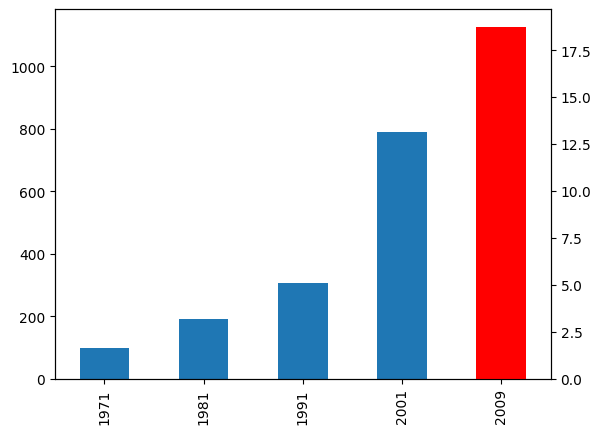

In [ ]:
## FIFTH VERSION OF SCRIPT

import pandas as pd
import matplotlib.pyplot as plt

# Pick out an interesting table - 2011 value of household expenditure by purpose
df = pd.read_excel(
    '/content/expenditure.xls',
    sheet_name='Table 1',
    na_values=' ',
    header=5,
    index_col=0,
    usecols=(0, 1, 2, 3, 4, 5, 7)
).dropna()

# Uncommented for presenting only!! Commented version at end of presentation
df.index.name = "Category"
df.columns = map(str, df.columns)
df.columns.name = "Years"
perc1971 = df.loc[:, '1971': '2009']
todaysCurrency = pd.DataFrame({'2009': df['2009.1']})
df = pd.concat((perc1971, todaysCurrency), axis=1, keys=("%1971", "today's money"))
df = df.stack(level=0)

def calculate_prices_in_todays_money_for_row(x):
    if x.name[1] != 'today':
        return x

    percent_row = (x.name[0], '%1971')
    ratio = df.loc[percent_row, :]
    ratio2009 = df.loc[percent_row, '2009']

    return ratio * x['2009'] / ratio2009

df = df.apply(calculate_prices_in_todays_money_for_row, axis=1)

# You only need this line in Jupyter
%matplotlib inline

# [K]
fig = plt.figure()

# Create a set of axes
ax_left = fig.add_subplot(111)
# And another sharing an x-axis
ax_right = ax_left.twinx()

# Grab a specific category, just to be clearer
category = df.transpose()["Communication"]

# Show bars for both the 1971% ratio (left y-axis) and today's money (right y-axis)
category["%1971"].plot(kind='bar', ax=ax_left)
category["today's money"].plot(kind='bar', ax=ax_right, color='red')
plt.show()

Now this script is getting a bit longer - don't worry, there is a tidier version at the end (not massively tidied, just the kind of quick tidy that it is totally reasonable to expect you to do when you're doing PhD coding!) Anyhow, skip down to the plotting part `[K]`

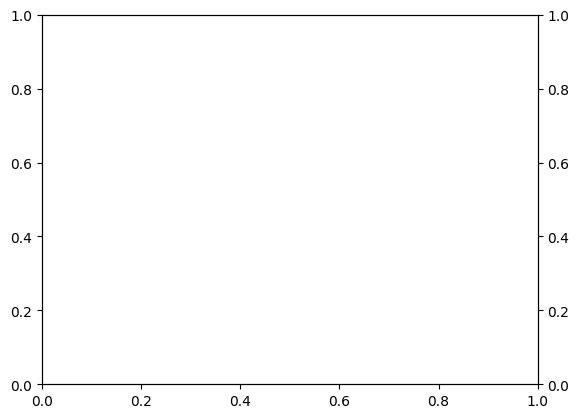

In [ ]:
fig = plt.figure()
# Create a set of axes
ax_left = fig.add_subplot(111)
# And another sharing an x-axis
ax_right = ax_left.twinx()

This trick here allows you to add two scales to a graph - one on the right, one on the left. Now pandas can show both bars (overlapping) and scaled correctly! Try running the script...

Something strange is going on here - we only see one set of bars. In fact, this is correct, because the currency is simply a scaling of the %1971 column - that's how we calculated it - then when we scale the bars we made to the same overall size on the plot, shock and horror, they match. This isn't a maths lesson, so if this confuses you or is unexpected, that isn't core to what's happening on a programming level, rather the kind of thing you might come across in your data analysis, dealing with interpolated or filled data.

In any case, plotting two sets of identical bars on different scales is clearly pretty useless. What would be more interesting would be, rather than looking at inflation-adjusted ratio and inflation-adjusted pound sterling price, how about inflation-adjusted ratio and actual price payed over the counter in 1971?

While I wait for the clamour to die down and you all to take your seats again (make sure you get the party poppers off the lights first), we'll start thinking of a way to do that...

# To infinity and beyond
## Integrate with other sources

For the next bit, we will need to install **Quandl** via pip3.

Have a quick look here [https://www.quandl.com/collections/uk/uk-inflation](https://www.quandl.com/collections/uk/uk-inflation)

Quandl is an online service that provides Python bindings to grab its online data (using JSON, as is standard nowadays). Note that, you can make only 50 calls a day, so an extra line or two to save a dump when you first use it (and only call again if the dump is missing) will give you extra mileage. However, we are going to cheat and just call it once manually...

In [ ]:
!pip3 install quandl

In [ ]:
import quandl
import requests

quandl.ApiConfig.api_key = "WymnvRyFS9eQA5B1R7HA"

try:
    cpi = quandl.get("UIFS/CPI_GBR", returns="pandas")
    print("Quandl data retrieved successfully:")
    print(cpi.head())
except quandl.QuandlError as e:
    print(f"Quandl Error: {e}")
except requests.exceptions.RequestException as e:
    print(f"Request Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Quandl Error: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@quandl.com.


So what might we want to do with that? Well, the consumer price index (CPI) gives us a way to adjust for inflation. Basically, it says £4.42 in 1948 would buy you the same amount of basic goods as £111.28 in 2009. So we can use this to turn our inflation-adjusted values back into non-inflation-adjusted values - we divide by the CPI. To make it a bit clearer, if we say £55bn was spent on Food in 1971, *in today's money* then we can say (approximately) $$ \unicode{163}55\mathrm{bn} \times \frac{CPI_{1971}}{CPI_{today}}$$ was spent in 1971-money. Ideally, if you looked up some government record from 1971, the first year of decimal UK currency, and it said "Ye Olde Expenditure for This Yeare of the HouseHoldes on the Foods and Stuffe of Similar Likeness", then that should be about the number it says. Please note, 1971 isn't that long ago - I'm just about in that generation, so it's not allowed to be.

Again, if you find this mysterious, you can just use the formula like any other mysterious statistical formula - this isn't a maths course, we just need it for sensibly coding the analysis!

NOTE:AGAIN WE DONT HAVE API KEY HERE

In [ ]:
## SIXTH VERSION OF SCRIPT

import pandas as pd
import matplotlib.pyplot as plt

# Pick out an interesting table - 2011 value of household expenditure by purpose
df = pd.read_excel(
    '/content/expenditure.xls',
    sheet_name='Table 1',
    na_values=' ',
    header=5,
    index_col=0,
    usecols=(0, 1, 2, 3, 4, 5, 7)
).dropna()

df.index.name = "Category"
df.columns = map(str, df.columns)
df.columns.name = "Years"

perc1971 = df.loc[:, '1971': '2009']
todaysCurrency = pd.DataFrame({'2009': df['2009.1']})

df = pd.concat((perc1971, todaysCurrency), axis=1, keys=("%1971", "currency"))
stacked_df = df.stack(level=0)

# ======= Pretty much the same down to here, only some label changes ======

# Switch around so the rows are years
df = stacked_df.transpose()

# [L]
# Turn the rows into actual DateTimeIndex objects
df.index = pd.to_datetime(df.index, format="%Y")

# [M]
# Grab the CPI values from the online database (if you ran this once, you shouldn't need to uncomment it)
#cpi = Quandl.get("UIFS/CPI_GBR", returns="pandas")
cpi_series = cpi["CPI: ALL ITEMS (INDEX NUMBER)"]

# [N]
# Create a Series where all the rows are...
our_cpi_values = pd.Series(index=df.index)
# Create a Series where the indices are... and the rows are...
our_cpi_values = pd.concat((cpi_series, our_cpi_values)).sort_index()
# After this none of the rows are...
our_cpi_values = our_cpi_values.interpolate()
# This command...
our_cpi_values = our_cpi_values.reindex(df.index)

# [O]
date2009 = pd.to_datetime("2009-01-01 00:00:00")
def calculate_prices_in_old_money_for_col(x):
    if x.name[1] != 'currency':
        return x

    percent_col = (x.name[0], '%1971')

    ratio = df.loc[:, percent_col]
    ratio2009 = df.loc[date2009, percent_col]

    cpi = our_cpi_values
    cpi2009 = our_cpi_values[date2009]
    return ratio * x[date2009] * cpi / (ratio2009 * cpi2009)

df = df.apply(calculate_prices_in_old_money_for_col)

# You only need this line in Jupyter
%matplotlib inline

# Some fancy plotting
fig = plt.figure()
ax_left = fig.add_subplot(111)
ax_right = ax_left.twinx()

# Pick the category we want
category = df["Communication"]
category["%1971"].plot(kind='bar', ax=ax_left, label="% of 1971")
category["currency"].plot(kind='bar', ax=ax_right, color='red', label="Currency")

# We do a little more decoration this time
plt.title("Household Expenditure on Communication")
ax_left.legend(loc=2)
ax_left.set_ylabel("% of 1971 (inflation-adjusted)")
ax_right.legend(loc=9)
ax_right.set_ylabel("£ bill. (direct comparison)")

# Update the labels in a pretty way
labels = df.index.map(lambda t: t.strftime("%Y"))
ax_left.set_xticklabels(labels)  # If you want to know why, comment out this line!
ax_left.set_xlabel("Year")

plt.show()

/tmp/ipython-input-1467756475.py:24: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stacked_df = df.stack(level=0)


NameError: name 'cpi' is not defined

The point of this exercise, really, is to show you how you can combine multiple incompatible sources of data in constructive ways that would be extremely hard in other tools. This is just one example - you could be doing this with data from a live feed, or a daily HDF5 astronomical data dump, or a molecular database, anything Python can handle, and bring it into pandas to integrate it with your Excel table.

In this particular case, we want to match up the years in the Expenditure data with the timestamps in the CDI data. While you could do this all with the years in columns, to my mind it is neater as the row index, so we start with our stacked dataset and transpose it (run the script above to set up `stacked_df` first):

In [ ]:
df = stacked_df.transpose()
df

Category Food and non-alcoholic beverages           \
                                    %1971 currency   
1971                           100.000000      NaN   
1981                           104.640913      NaN   
1991                           117.230576      NaN   
2001                           136.729755      NaN   
2009                           151.008988   83.813   

Category Alcoholic beverages and tobacco          Clothing and footwear  \
                                   %1971 currency                 %1971   
1971                          100.000000      NaN            100.000000   
1981                           99.237497      NaN            119.877158   
1991                           92.064204      NaN            186.847400   
2001                           88.024221      NaN            344.276183   
2009                           89.613302   31.128            552.546860   

Category          Housing, water and fuels2           \
         currency                     %1971 currency   
1971          NaN                100.000000      NaN   
1981          NaN                116.734336      NaN   
1991          NaN                138.879523      NaN   
2001          NaN                152.250032      NaN   
2009       47.599                160.082001  193.447   

Category Furnishings, household equipment and maintenance           ...  \
                                                    %1971 currency  ...   
1971                                           100.000000      NaN  ...   
1981                                           116.808722      NaN  ...   
1991                                           159.656426      NaN  ...   
2001                                           261.638586      NaN  ...   
2009                                           262.682524   43.867  ...   

Category   Total goods            Total services           \
                 %1971 currency            %1971 currency   
1971        100.000000      NaN       100.000000      NaN   
1981        116.882766      NaN       127.667167      NaN   
1991        155.755787      NaN       183.960495      NaN   
2001        226.782179      NaN       230.874717      NaN   
2009        285.454027  411.727       244.720566  451.585   

Category UK tourist expenditure abroad           \
                                 %1971 currency   
1971                        100.000000      NaN   
1981                        193.380615      NaN   
1991                        298.082480      NaN   
2001                        699.054374      NaN   
2009                        576.333071   28.994   

Category  less foreign tourist expenditure           \
                                     %1971 currency   
1971                            100.000000      NaN   
1981                            151.616612      NaN   
1991                            187.182066      NaN   
2001                            222.215836      NaN   
2009                            257.810030   19.554   

Category Household final consumption expenditure4           
                                            %1971 currency  
1971                                   100.000000      NaN  
1981                                   121.341138      NaN  
1991                                   168.287800      NaN  
2001                                   232.291680      NaN  
2009                                   264.930072  872.752  

[5 rows x 36 columns]

Now we can get a year, something like this:

In [ ]:
df.loc["1971"] # instead of stacked_df[1971]

Category   Food and non-alcoholic beverages           \
                                      %1971 currency   
1971-01-01                            100.0      NaN   

Category   Alcoholic beverages and tobacco          Clothing and footwear  \
                                     %1971 currency                 %1971   
1971-01-01                           100.0      NaN                 100.0   

Category            Housing, water and fuels2           \
           currency                     %1971 currency   
1971-01-01      NaN                     100.0      NaN   

Category   Furnishings, household equipment and maintenance           ...  \
                                                      %1971 currency  ...   
1971-01-01                                            100.0      NaN  ...   

Category     Total goods            Total services           \
                   %1971 currency            %1971 currency   
1971-01-01         100.0      NaN            100.0      NaN   

Category   UK tourist expenditure abroad           \
                                   %1971 currency   
1971-01-01                         100.0      NaN   

Category    less foreign tourist expenditure           \
                                       %1971 currency   
1971-01-01                             100.0      NaN   

Category   Household final consumption expenditure4           
                                              %1971 currency  
1971-01-01                                    100.0      NaN  

[1 rows x 36 columns]

We are going to learn how to interpolate in time - this has many useful applications and is one of pandas' main strengths. Normally, we would be resampling, say, a broken up series of timestamped measurements to try to estimate some value at daily, hourly, monthly or other regular intervals. Here though, we have one series of timestamps and want to match them to another.

The first step is to make sure pandas knows our Years in the Expenditure table are actually dates, not some random integers.

In [ ]:
# [L]
# Turn the rows into actual DateTimeIndex objects
df.index = pd.to_datetime(df.index, format="%Y")
df.index

DatetimeIndex(['1971-01-01', '1981-01-01', '1991-01-01', '2001-01-01',
               '2009-01-01'],
              dtype='datetime64[ns]', freq=None)

In one not-so-fell swoop, we convert all of the entries in the index (i.e. row headings, i.e. years) into DateTime objects, and set the index (i.e. the row headings) to the converted values. The pandas output isn't very pretty but it does confirm that. Now what can we do with it?

Well, put it with the CPI info...

In [ ]:
# [M]
cpi["CPI: ALL ITEMS (INDEX NUMBER)"]

NameError: name 'cpi' is not defined

To mix this data together, we need to be able to map dates we have in the DataFrame index with interpolated values from this series... so begins our next challenge!

# Quiz
## What on Earth are we doing in Section `[N]`?

Stars up! Fill in missing text for each of the ...s in the section [N] comments above. Update Etherpad for reference! The more detail, the better, and if provide links to the docs for each line.

In [ ]:
# Create a Series where all the rows are...
our_cpi_values = pd.Series(index=df.index)
# Create a Series where the indices are... and the rows are...
our_cpi_values = pd.concat((cpi_series, our_cpi_values)).sort_index()
# After this none of the rows are...
our_cpi_values = our_cpi_values.interpolate()
# This command...
our_cpi_values = our_cpi_values.reindex(df.index)

NameError: name 'cpi_series' is not defined

Note that I'm being inefficient and creating new objects every time - if you are dealing with large data and want to reuse your data structures, many pandas operations allow you to pass an argument like `overwrite=True` or `copy=False` to force that behaviour.

In [ ]:
# [O]
date2009 = pd.to_datetime("2009-01-01 00:00:00")
def calculate_prices_in_old_money_for_col(x):
    if x.name[1] != 'currency':
        return x

    percent_col = (x.name[0], '%1971')

    ratio = df.loc[:, percent_col]
    ratio2009 = df.loc[date2009, percent_col]

    cpi = our_cpi_values
    cpi2009 = our_cpi_values[date2009]
    return ratio * x[date2009] * cpi / (ratio2009 * cpi2009)

This is really just our old function, slightly adjusted to deal with columns and with the `our_cpi_values` variable used, as I described above.

$$ \unicode{163}_{y} = \unicode{163}_{2009} \times \frac{\%_y}{\%_{2009}} \times \frac{\mathrm{CPI}_y}{\mathrm{CPI}_{2009}}$$

This is as complicated as I let this function get. We scale the total figure for 2009 first by the percentage value, then by the CPI.

The rest is broadly the same, we just adjust one or two calls for the fact we now have Years in rows, instead of columns. The last bit is plotting - this one is a little nicer... in particular:

/tmp/ipython-input-3147296330.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_left.legend(loc=2)
/tmp/ipython-input-3147296330.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_right.legend(loc=9)
/tmp/ipython-input-3147296330.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_left.set_xticklabels(labels)  # If you want to know why, comment out this line!


Text(0.5, 4.444444444444445, 'Year')

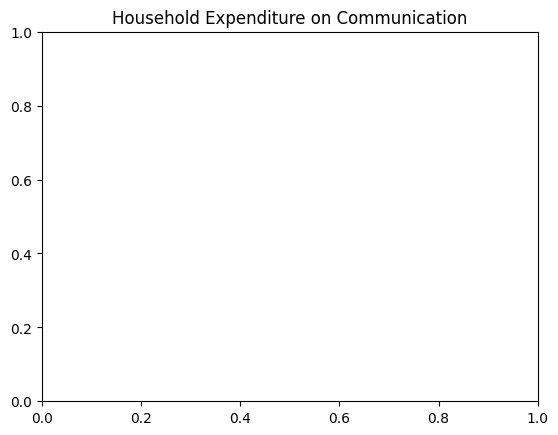

In [ ]:
# We do a little more decoration this time
plt.title("Household Expenditure on Communication")
ax_left.legend(loc=2)
ax_left.set_ylabel("% of 1971 (inflation-adjusted)")
ax_right.legend(loc=9)
ax_right.set_ylabel("£ bill. (direct comparison)")

# Update the labels in a pretty way
labels = df.index.map(lambda t: t.strftime("%Y"))
ax_left.set_xticklabels(labels)  # If you want to know why, comment out this line!
ax_left.set_xlabel("Year")

Here we add some axis labels and so forth. The legend locations are a bit strange - numbers 0 to 10, indicating the preferred location - see the [matplotlib.pyplot.legend](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend) docs for the full list of locations.

Now, what do we do with the labels? First we take the index, which is a Series (1D array) then we use a member called `map`. This applies a function to each element and returns the mutated list. In this case, our function is a lambda function that takes one argument (a DataTimeIndex) and formats it, just printing the Year component as a string. This is equivalent to:

```python
    def stringify_date(date):
        return date.format("%Y")
    
    labels = df.index.map(stringify_date)
```

The lambda function just makes it a bit more neat.

If you run the full script above, you should now see a nice comparison of what people spent on Communications (we got bored with Food and switched) in 1971, in their money, (red) against the inflation-adjusted ratio (blue).

# The Coup de Grace
## Publishable paper to take home

One last trick, just to round it off and give us a useful analysis that we could pop into a journal and sit back. Lets produce a series of plots in a row, just like that one, for interesting categories - say, "Communications", "Food" and "Alcohol &amp; Tobacco". How have they all changed (a) in relative terms, compared to say, the price of bread/basic goods, and (b) in absolute terms, the number of 1971, 1981, 1991, etc. pounds sterling that changed hands in those years.

In [ ]:
## SEVENTH VERSION OF SCRIPT

import pandas as pd
import matplotlib.pyplot as plt

# Pick out an interesting table - 2011 value of household expenditure by purpose
df = pd.read_excel(
    '/content/expenditure.xls',
    sheet_name='Table 1',
    na_values=' ',
    header=5,
    index_col=0,
    usecols=(0, 1, 2, 3, 4, 5, 7)
).dropna()

df.index.name = "Category"
df.columns = map(str, df.columns)
df.columns.name = "Years"

perc1971 = df.loc[:, '1971': '2009']
todaysCurrency = pd.DataFrame({'2009': df['2009.1']})

df = pd.concat((perc1971, todaysCurrency), axis=1, keys=("%1971", "currency"))
df = df.stack(level=0)

# Note we have swapped around here!
df = df.transpose()

# [L]
df.index = pd.to_datetime(df.index, format="%Y")

# [M]
#cpi = quandl.get("UIFS/CPI_GBR", returns="pandas")
cpi_series = cpi["CPI: ALL ITEMS (INDEX NUMBER)"]

# [N]
our_cpi_values = pd.Series(index=df.index)
our_cpi_values = pd.concat((cpi_series, our_cpi_values)).sort_index()
our_cpi_values = our_cpi_values.interpolate()
our_cpi_values = our_cpi_values.reindex(df.index)

# [O]
date2009 = pd.to_datetime("2009-01-01 00:00:00")
def calculate_prices_in_old_money_for_col(x):
    if x.name[1] != 'currency':
        return x

    percent_col = (x.name[0], '%1971')

    ratio = df.loc[:, percent_col]
    ratio2009 = df.loc[date2009, percent_col]

    cpi = our_cpi_values
    cpi2009 = our_cpi_values[date2009]
    return ratio * x[date2009] * cpi / (ratio2009 * cpi2009)

df = df.apply(calculate_prices_in_old_money_for_col)

# You only need this line in Jupyter
%matplotlib inline

categories_of_interest = (
    "Communication",
    "Food and non-alcoholic beverages",
    "Alcoholic beverages and tobacco"
)

fig = plt.figure(figsize=(20, 5))

for i, category_name in enumerate(categories_of_interest):
    ax_left = fig.add_subplot(1, len(categories_of_interest), i + 1)
    ax_right = ax_left.twinx()

    category = df[category_name]
    category["%1971"].plot(kind='bar', ax=ax_left, color='blue', label="% of 1971")
    category["currency"].plot(kind='bar', ax=ax_right, color='red', label="Currency")

    plt.title("Household Expenditure on " + category_name)
    ax_left.legend(loc=2)
    ax_left.set_ylabel("% of 1971 (inflation-adjusted)")
    ax_right.legend(loc=9)
    ax_right.set_ylabel("£ bill. (direct comparison)")

    ax_left.set_xticklabels(df.index.map(lambda t: t.strftime("%Y")))
    ax_left.set_xlabel("Year")

plt.show()

/tmp/ipython-input-2293057894.py:24: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.stack(level=0)


NameError: name 'cpi' is not defined

Nothing significant has changed, right down to the plotting section. At that point, we make sure our figure is a sensible shape for several plots:

In [ ]:
fig = plt.figure(figsize=(20, 5))

<Figure size 2000x500 with 0 Axes>

then we loop through our chosen categories, numbering them on the way, and identifying the actual location in the row of plots with `add_subplot`

In [ ]:
for i, category_name in enumerate(categories_of_interest):
    ax_left = fig.add_subplot(1, len(categories_of_interest), i + 1)
    # ...

NameError: name 'categories_of_interest' is not defined

we drop in the category names in a couple of places, and that is it! The wonderful thing about this approach to analysis is extending functionality as we just did, is often very quick and takes minimal changes.

So looking at the final output, what do we see? In all cases, expenditure rises in absolute terms. The UK spends more on everything in absolute terms, year on year. However, with Communication, we see it is growing exponentially, with Alcohol &amp; Tobacco it is logarithmic or maybe even moving towards a steady limit. The inflation-adjusted values in blue are even more emphatic. Communication still seems to be at least polynomial, although the jumps decrease since the early 2000s. Food is on a gradual linear increase, but pretty consistent. Alcohol &amp; Tobacco fell in relative spending terms from 1971, but since the early 2000s has been fairly static.

Of course this is far too little data to do any proper analysis, and the approach has been pretty...rough... but this process should show you how you can apply pandas to your research analysis.

One last thing - I keep mentioning tidy code and what you saw up there wasn't really it! A two minute run through, provides the much clearer and readable version below:

In [ ]:
## FINAL VERSION OF SCRIPT

import pandas as pd
import matplotlib.pyplot as plt


def load_expenditure_data():
    """Get the ONS expenditure data from an Excel file"""

    # Load the data from a specific table in the XLS
    df = pd.read_excel(
        '/content/expenditure.xls',
        sheet_name='Table 1',
        na_values=' ',
        header=5,
        index_col=0,
        usecols=(0, 1, 2, 3, 4, 5, 7)
    ).dropna()

    # Split data into two parts - ratio against 1971 and the final column,
    # an absolute value of bill. GBP spent (for 2009)
    df.columns = map(str, df.columns)
    perc1971 = df.loc[:, '1971': '2009']
    todaysCurrency = pd.DataFrame({'2009': df['2009.1']})

    # Make the columns in each part subcolumns under two headings
    df = pd.concat((perc1971, todaysCurrency), axis=1, keys=("%1971", "currency"))

    # Swap the %1971 and currency into sub-rows for each category
    # At the moment, all our currency data is empty, except for 2009
    df = df.stack(level=0)

    # We actually want rows to be years
    df = df.transpose()

    # Name the column and index for clarity
    df.columns.name = "Category"
    df.index.name = "Years"

    # Turn the years into something pandas knows are dates
    df.index = pd.to_datetime(df.index, format="%Y")

    return df


def get_cpi_for_dates(dates):
    """Use an online service to get historical Consumer Price Index data"""

    # Grab the CPI data from Quandl
    #cpi = quandl.get("UIFS/CPI_GBR", returns="pandas")
    cpi_series = cpi["CPI: ALL ITEMS (INDEX NUMBER)"]

    # Create a Series of NaNs, where the index is the dates we want
    our_cpi_values = pd.Series(index=dates)

    # Merge our desired dates into the list we have been given
    our_cpi_values = pd.concat((cpi_series, our_cpi_values)).sort_index()

    # Interpolate the online CPI values by date, to get rid of the
    # NaNs we merged in
    our_cpi_values = our_cpi_values.interpolate()

    # Extract only the dates we want
    our_cpi_values = our_cpi_values.reindex(dates)

    return our_cpi_values


# For comparisons, we we will need 2009 as a DateTime object
date2009 = pd.to_datetime("2009-01-01 00:00:00")
def calculate_prices_in_old_money_for_col(x):
    """Fill in the blank (NaN) entries in a column of currency with the non-inflation-adjusted expenditure"""
    # We only need to alter subcolumns with currency
    if x.name[1] != 'currency':
        return x

    category = x.name[0]

    # This is the multi-index for the %1971 value under the
    # same category as column x
    percent_col = (category, '%1971')

    # Get the %1971 values in the category for each year
    ratio = df.loc[:, percent_col]

    # Get the %1971 value for 2009
    ratio2009 = df.loc[date2009, percent_col]

    # Get the CPI values in each year
    cpi = our_cpi_values

    # Get the 2009 CPI value
    cpi2009 = our_cpi_values[date2009]

    # The currency value is scaled by the CPI difference
    # from 2009 and the change in ratio from 2009
    x = ratio * x[date2009] * cpi / (ratio2009 * cpi2009)

    return x


# You only need this line in Jupyter
%matplotlib inline
def plot_categories(df, categories_of_interest):
    """
    We plot out a series of figures showing the currency and %1971
    values for a series of expenditure categories
    """

    # Set a sensible size of figure
    fig = plt.figure(figsize=(20, 5))
    number_of_plots = len(categories_of_interest)

    # Go through each category desired and create a new subplot
    for i, category_name in enumerate(categories_of_interest):
        # We create the figure as the (i+1)th place in a (1 x number_of_plots) grid
        ax_left = fig.add_subplot(1, number_of_plots, i + 1)

        # We want another ax sharing the same x-axis
        ax_right = ax_left.twinx()

        # Get the category object from the DataFrame
        category = df[category_name]

        # Plot the %1971 bar using LHS
        category["%1971"].plot(kind='bar', ax=ax_left, color='blue', label="% of 1971")

        # Plot the currency using RHS y-axis
        category["currency"].plot(kind='bar', ax=ax_right, color='red', label="Currency")

        plt.title("Household Expenditure on " + category_name)

        # Put the axes legends in the upper left (see docs for loc values)
        ax_left.legend(loc=2)
        ax_left.set_ylabel("% of 1971 (inflation-adjusted)")
        ax_right.legend(loc=9)
        ax_right.set_ylabel("£ bill. (direct comparison)")

        # Convert the DateTime objects to something pretty
        ax_left.set_xticklabels(df.index.map(lambda t: t.strftime("%Y")))
        ax_left.set_xlabel("Year")

    plt.show()


# Get our data in
df = load_expenditure_data()

# Use the Consumer Price Index to work out what the non-inflation-adjusted prices were
our_cpi_values = get_cpi_for_dates(df.index)

# Update the DataFrame by scaling for CPI
df = df.apply(calculate_prices_in_old_money_for_col)

# Pick a few categories we want plotted
categories_of_interest = (
    "Communication",
    "Food and non-alcoholic beverages",
    "Alcoholic beverages and tobacco"
)

# Display the grid of plots
plot_categories(df, categories_of_interest)

/tmp/ipython-input-2190856889.py:31: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.stack(level=0)


NameError: name 'cpi' is not defined

Well, that's not _quite_ the final version of the script. We wouldn't want to leave you thinking all your pretty business intelligence (BI) tools with their interactive data dashboards are way flasher than what Python has (things like PowerBI and Tableau, which you may or may not have come across).

This is departing into a whole separate realm of interactive web-based plotting, so we will simply show how a few changes to use the plotting library, _Bokeh_ (pronounced "bouquet", as in "Hyacinth" for those old enough to get the reference).

## Final Exercise

The version below has (largely) the same comments and code as the _matplotlib_ version above. However, it instead uses _bokeh_ to create interactive plots.

Suggest corrections, in Etherpad, for the comments that no longer make sense.

In [ ]:
## FINAL VERSION OF SCRIPT, VERSION 2

import pandas as pd
#import matplotlib.pyplot as plt
import bokeh.plotting as plt

from bokeh.io import output_notebook
from bokeh.layouts import row
from bokeh.models import Range1d, LinearAxis
output_notebook()

def load_expenditure_data():
    """Get the ONS expenditure data from an Excel file"""

    # Load the data from a specific table in the XLS
    df = pd.read_excel(
        '/content/expenditure.xls',
        sheet_name='Table 1',
        na_values=' ',
        header=5,
        index_col=0,
        usecols=(0, 1, 2, 3, 4, 5, 7)
    ).dropna()

    # Split data into two parts - ratio against 1971 and the final column,
    # an absolute value of bill. GBP spent (for 2009)
    df.columns = map(str, df.columns)
    perc1971 = df.loc[:, '1971': '2009']
    todaysCurrency = pd.DataFrame({'2009': df['2009.1']})

    # Make the columns in each part subcolumns under two headings
    df = pd.concat((perc1971, todaysCurrency), axis=1, keys=("%1971", "currency"))

    # Swap the %1971 and currency into sub-rows for each category
    # At the moment, all our currency data is empty, except for 2009
    df = df.stack(level=0)

    # We actually want rows to be years
    df = df.transpose()

    # Name the column and index for clarity
    df.columns.name = "Category"
    df.index.name = "Years"

    # Turn the years into something pandas knows are dates
    df.index = pd.to_datetime(df.index, format="%Y")

    return df


def get_cpi_for_dates(dates):
    """Use an online service to get historical Consumer Price Index data"""

    # Grab the CPI data from Quandl
    #cpi = quandl.get("UIFS/CPI_GBR", returns="pandas")
    cpi_series = cpi["CPI: ALL ITEMS (INDEX NUMBER)"]

    # Create a Series of NaNs, where the index is the dates we want
    our_cpi_values = pd.Series(index=dates)

    # Merge our desired dates into the list we have been given
    our_cpi_values = pd.concat((cpi_series, our_cpi_values)).sort_index()

    # Interpolate the online CPI values by date, to get rid of the
    # NaNs we merged in
    our_cpi_values = our_cpi_values.interpolate()

    # Extract only the dates we want
    our_cpi_values = our_cpi_values.reindex(dates)

    return our_cpi_values


# For comparisons, we we will need 2009 as a DateTime object
date2009 = pd.to_datetime("2009-01-01 00:00:00")
def calculate_prices_in_old_money_for_col(x):
    """Fill in the blank (NaN) entries in a column of currency with the non-inflation-adjusted expenditure"""
    # We only need to alter subcolumns with currency
    if x.name[1] != 'currency':
        return x

    category = x.name[0]

    # This is the multi-index for the %1971 value under the
    # same category as column x
    percent_col = (category, '%1971')

    # Get the %1971 values in the category for each year
    ratio = df.loc[:, percent_col]

    # Get the %1971 value for 2009
    ratio2009 = df.loc[date2009, percent_col]

    # Get the CPI values in each year
    cpi = our_cpi_values

    # Get the 2009 CPI value
    cpi2009 = our_cpi_values[date2009]

    # The currency value is scaled by the CPI difference
    # from 2009 and the change in ratio from 2009
    x = ratio * x[date2009] * cpi / (ratio2009 * cpi2009)

    return x

def plot_categories(df, categories_of_interest):
    """
    We plot out a series of figures showing the currency and %1971
    values for a series of expenditure categories
    """

    # Set a sensible size of figure

    number_of_plots = len(categories_of_interest)
    plots = []

    # Go through each category desired and create a new subplot
    for i, category_name in enumerate(categories_of_interest):
        # We create the figure as the (i+1)th place in a (1 x number_of_plots) grid
        ax_left = plt.figure()
        fig = plt.figure(
            title = category_name,
            x_axis_type='datetime',
            plot_width=300,
            plot_height=500,
            toolbar_location='below',
            active_scroll='wheel_zoom',
            tools='pan,wheel_zoom,box_zoom,save,reset'
        )

        # Get the category object from the DataFrame
        category = df[category_name]

        # We want another ax sharing the same x-axis
        fig.y_range = Range1d(start=0, end=category["%1971"].max() * 1.1)
        fig.extra_y_ranges = {'currency': Range1d(start=0, end=100)}

        # Plot the %1971 bar using LHS
        fig.vbar(
            x=category.index,
            top=category["%1971"],
            width=2e11,
            legend_label="% of 1971"
        )

        # Plot the currency using RHS y-axis
        fig.vbar(
            x=category.index,
            top=category["currency"],
            width=2e11,
            color='red',
            y_range_name='currency',
            legend_label="Currency"
        )

        # Put the axes legends in the upper left (see docs for loc values)
        fig.legend.location = 'top_left'
        fig.yaxis.axis_label = "% of 1971 (inflation-adjusted)"
        fig.add_layout(LinearAxis(y_range_name='currency', axis_label="£ bill. (direct comparison)"), 'right')

        # Convert the DateTime objects to something pretty
        fig.xaxis.axis_label = "Year"

        plots.append(fig)

    plt.show(row(*plots))


# Get our data in
df = load_expenditure_data()

# Use the Consumer Price Index to work out what the non-inflation-adjusted prices were
our_cpi_values = get_cpi_for_dates(df.index)

# Update the DataFrame by scaling for CPI
df = df.apply(calculate_prices_in_old_money_for_col)

# Pick a few categories we want plotted
categories_of_interest = (
    "Communication",
    "Food and non-alcoholic beverages",
    "Alcoholic beverages and tobacco"
)

# Display the grid of plots
plot_categories(df, categories_of_interest)

/tmp/ipython-input-91135874.py:36: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.stack(level=0)


NameError: name 'cpi' is not defined

_Bokeh_ also allows you have interactive buttons and sliders, as well as many of the plotting types available in _matplotlib_. You could then export this as an interactive page that you can embed in a website, for instance.

In the most recent versions of _bokeh_, you can in a single short line make the legend clickable to hide individual plots: `fig.legend.click_policy = 'hide'`

If there is some time left, or you are coming back to this as an exercise, try using pandas to export an Excel file, or if you are feeling brave, export to SQL and create an Access database with [PyPyODBC](https://code.google.com/archive/p/pypyodbc/wikis/PyPyODBC_Example_Tutorial.wiki)

A side note on big data: some tasks like MapReduce, and other buzzwordy things engineers like me don't deal with much, have specialized non-Python tools you may want to use, but Python is the best tool for analysing the output and passing to something else. Maybe you just have a series of bash scripts, or another tool for generating data. If this sounds like a use-case for you, you may wish to check out [luigi](https://github.com/spotify/luigi), an open source Python-based pipeline management tool from Spotify.

Another tip if you need your Python fast - you can use Cython to translate it from Python to C and compile it automatically. This is common in science and data analysis for accelerating your Python code. If you're proficient in C then, when you start getting that way in Python, you could check out something like Philip Herron's book *Learning Cython* - he is a Belfast-based developer who has used these tools working for the New York Stock Exchange.